In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from pyuvdata import UVData
import time
import copy

In [2]:
import polcal

In [27]:
def cal_plotter(result, freq, ant):
    """
    Plots the amplitude and phase of each element of the Jones matrix after applying
    the Wirtinger calibration.
        
    Parameters
    ----------
    result:
    freq: int
    ant: int
    
    Returns
    -------
      
    """
    fig, axes = plt.subplots(figsize=(15,33), nrows=4, ncols=2)

#     for ant in range(19):
    ax = axes[0,0]
    ax.plot(np.abs(result[ant,freq,0,0,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("xx - amp")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = axes[0,1]
    ax.plot(np.angle(result[ant,freq,0,0,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("xx - phase")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = axes[1,0]
    ax.plot(np.abs(result[ant,freq,0,1,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("xy - amp")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = axes[1,1]
    ax.plot(np.angle(result[ant,freq,0,1,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("xy - phase")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = axes[2,0]
    ax.plot(np.abs(result[ant,freq,1,0,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("yx - amp")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = axes[2,1]
    ax.plot(np.angle(result[ant,freq,1,0,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("yx - phase")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = axes[3,0]
    ax.plot(np.abs(result[ant,freq,1,1,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("yy - amp")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = axes[3,1]
    ax.plot(np.angle(result[ant,freq,1,1,:]),'-*', lw=0.5)
    ax.set_xlabel("Iterations")
    ax.set_title("yy - phase")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

In [4]:
path_sim = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/Simulation/'

In [5]:
uvd_raw = UVData()
uvd_raw.read(path_sim+'zen.2457755.25677.uvCP.uvh5')
uvd_sim = UVData()
uvd_sim.read(path_sim+'zen.2457755.25677.uvCP.uvh5')

In [6]:
uv_polcal_single = polcal.uvdata_pol_calibrator(model_data=uvd_sim, real_data=uvd_raw, mode="model_based")

In [7]:
uv_polcal_single.data_slice(use_all_times=True, use_all_ants=True, base_freq_range=[300], prod_freq_range=[300])

In [8]:
uv_polcal_single.base_data_array.shape

(19, 19, 61, 2, 2)

In [9]:
gain_array_iterations = []
for iteration in [10]:#,20,30,40,50,100,200,500,1000,2000,3000,4000]:
    start_time = time.time()
    ### Run the calibration ###
    test = uv_polcal_single.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
    print("--- %s seconds ---" % (time.time() - start_time))
    print(uv_polcal_single.gain_array[0,300])
    gain_array_iterations.append(copy.deepcopy(uv_polcal_single.gain_array[:,300]))

--- 0.7670402526855469 seconds ---
[[ 1.00000000e+00+0.00000000e+00j -7.72729993e-17+4.33680869e-19j]
 [-4.76500098e-19+8.67361738e-19j  1.00000000e+00-4.86535725e-18j]]


In [10]:
test[0,300,:,:,1]
test.shape

(19, 1024, 2, 2, 10)

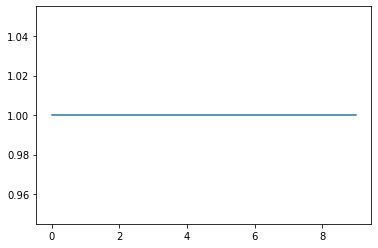

In [11]:
plt.plot(np.abs(test[0,300,1,1,:]))

In [12]:
uv_pcal_124 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_224 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_324 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_424 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_524 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_624 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_724 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_824 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_924 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")
uv_pcal_1024 = polcal.uvdata_pol_calibrator(model_data=uvd_sim, 
                                        real_data=uvd_raw, mode="model_based")

pcal_arr = [uv_pcal_124,uv_pcal_224,uv_pcal_324,uv_pcal_424,uv_pcal_524,
            uv_pcal_624,uv_pcal_724,uv_pcal_824,uv_pcal_924,uv_pcal_1024]
range1 = [0,124,224,324,424,524,624,724,824,924]
range2 = [123,223,323,423,523,623,723,823,923,1023]

for i,name in enumerate(pcal_arr):
    name.data_slice(use_all_times=True, use_all_ants=True, 
                    base_freq_range=[range1[i],range2[i]], prod_freq_range=[range1[i],range2[i]])

In [13]:
%%time
iteration = 10

result_124 = uv_pcal_124.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_224 = uv_pcal_224.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_324 = uv_pcal_324.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_424 = uv_pcal_424.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_524 = uv_pcal_524.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_624 = uv_pcal_624.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_724 = uv_pcal_724.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_824 = uv_pcal_824.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_924 = uv_pcal_924.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)
result_1024 = uv_pcal_1024.Wirtinger_lm_cal(diagonalize=False, Niteration=iteration)

CPU times: user 7min 44s, sys: 40 ms, total: 7min 44s
Wall time: 7min 44s


In [14]:
result_124.shape

(19, 1024, 2, 2, 10)

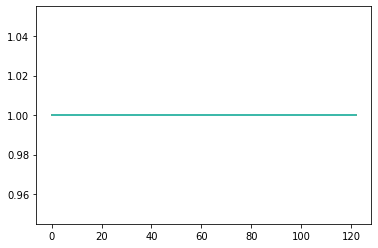

In [15]:
plt.figure()
plt.plot(np.abs(result_124[0,:123,1,1,:]))

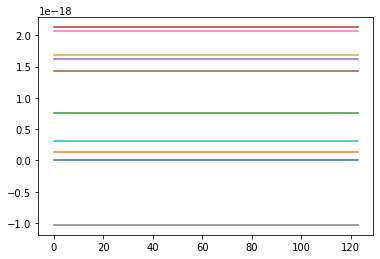

In [16]:
plt.figure()
plt.plot(np.angle(result_124[0,:124,1,1,:]));

I want to pull out all of the iterations, frequencies, and value of the element of the Jones matrix I want to look at for each antenna.

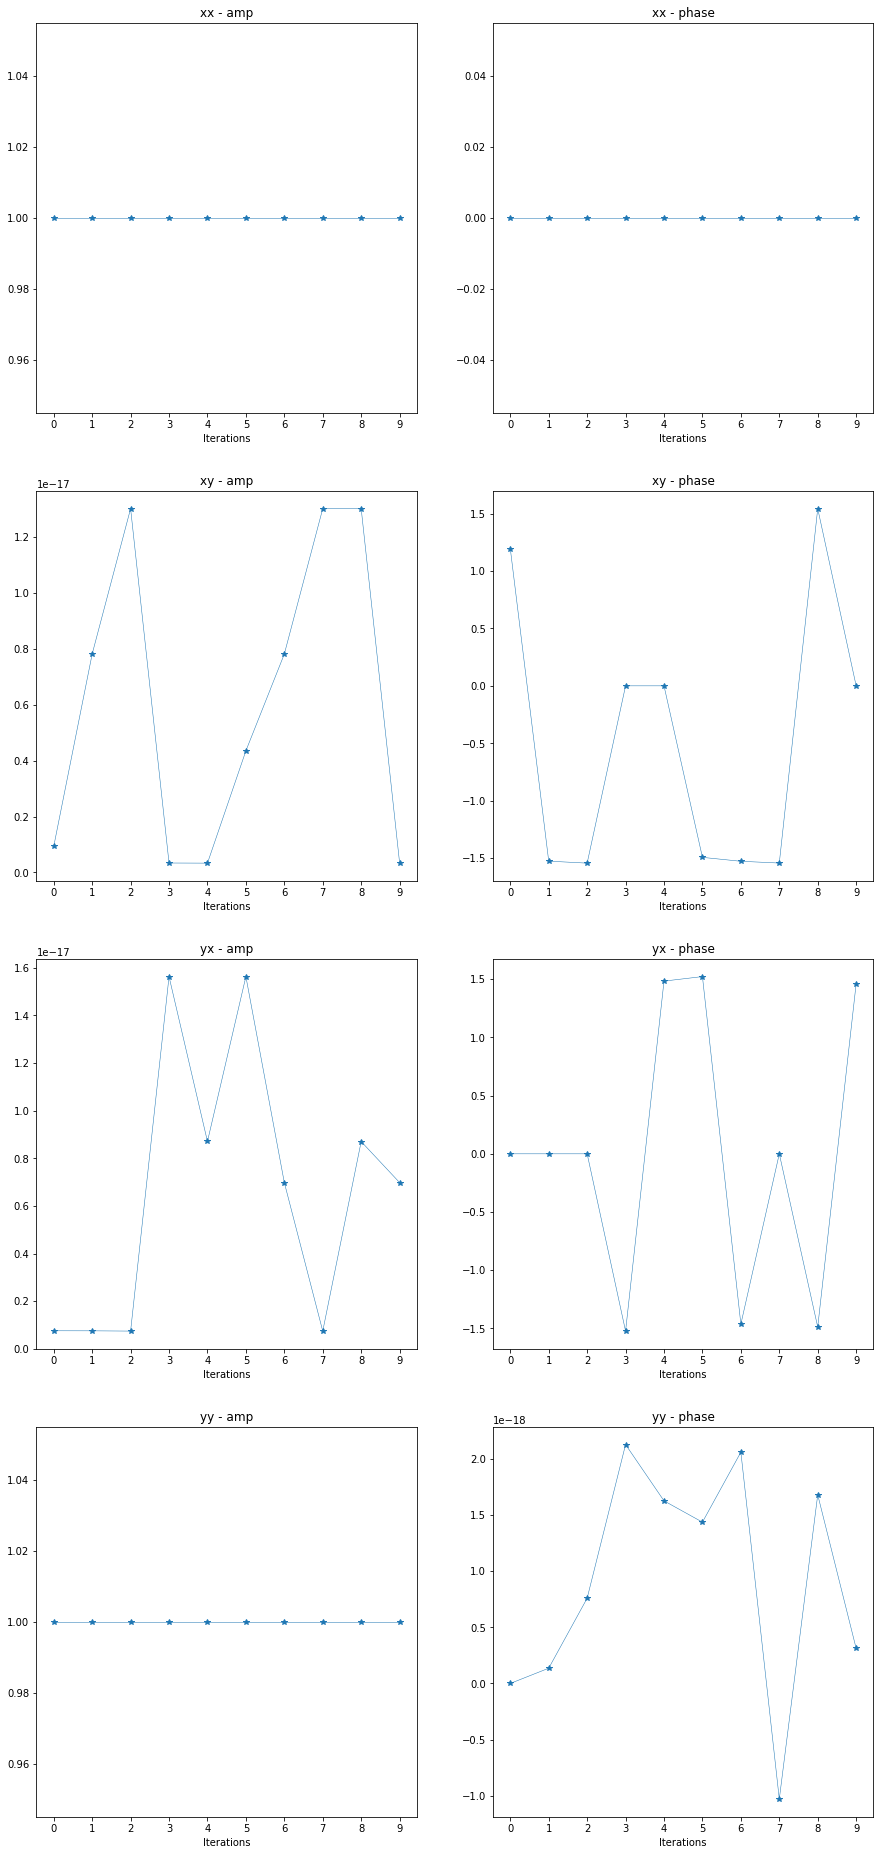

In [28]:
cal_plotter(result_124, freq=123, ant=0)

True

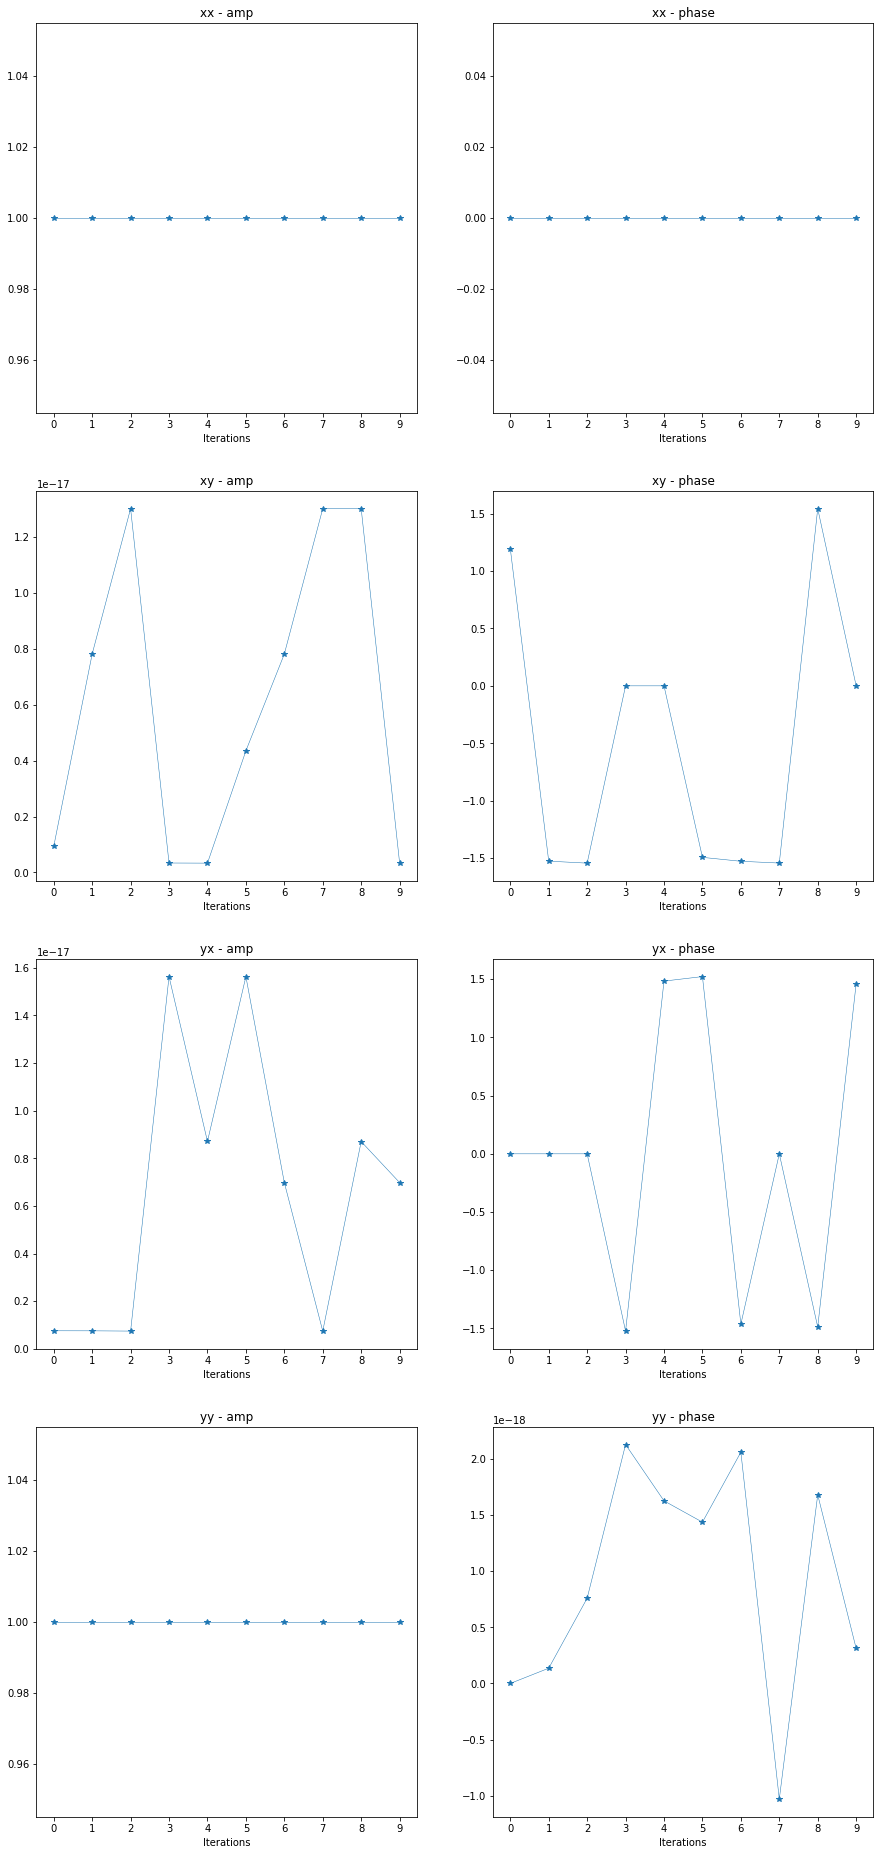

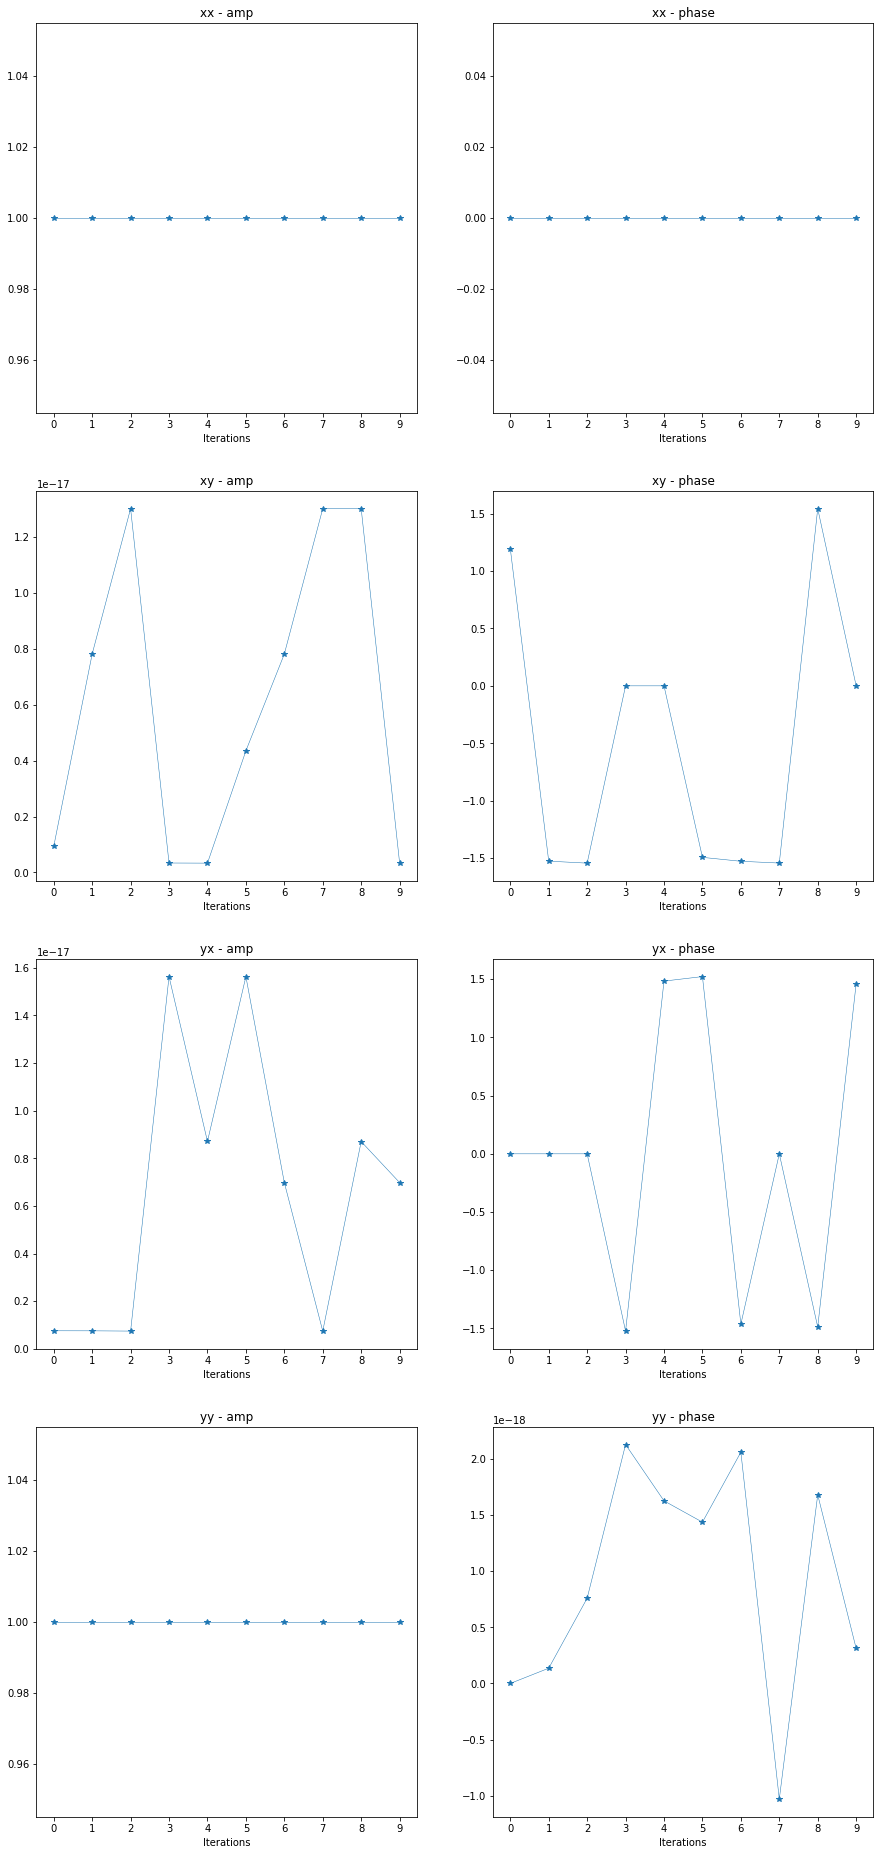

In [24]:
cal_plotter(result_124, freq=123, ant=0) == cal_plotter(result_124, freq=67, ant=0)